In [5]:
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import scipy.stats as stats
import csv

from statsmodels.stats.multicomp import MultiComparison

In [6]:
con = pymysql.connect(host="localhost", user="gabic", passwd="1234", db="doenca_renal_cronica")
con.select_db('doenca_renal_cronica')
cursor = con.cursor()  
cursor.connection.autocommit(True)

In [7]:
#criando os dataframes por tabela 
dados_consulta = pd.read_sql('SELECT * FROM doenca_renal_cronica.dados_consulta',con=con)
cidade = pd.read_sql('SELECT * FROM doenca_renal_cronica.cidade',con=con)
ubs = pd.read_sql('SELECT * FROM doenca_renal_cronica.ubs',con=con)
aval_funcao_renal = pd.read_sql('SELECT * FROM doenca_renal_cronica.aval_funcao_renal',con=con)
consulta_has = pd.read_sql('SELECT * FROM doenca_renal_cronica.consulta_has',con=con)
consulta_drc = pd.read_sql('SELECT * FROM doenca_renal_cronica.consulta_drc',con=con)
consulta_dm = pd.read_sql('SELECT * FROM doenca_renal_cronica.consulta_dm',con=con)
calculo_tfg = pd.read_sql('SELECT * FROM doenca_renal_cronica.calculo_tfg',con=con)
preparacao_trs = pd.read_sql('SELECT * FROM doenca_renal_cronica.preparacao_trs',con=con)
raca = pd.read_sql('SELECT * FROM doenca_renal_cronica.raca',con=con)
instrucao = pd.read_sql('SELECT * FROM doenca_renal_cronica.instrucao',con=con)
paciente = pd.read_sql('SELECT * FROM doenca_renal_cronica.paciente',con=con)
exame_fisico = pd.read_sql('SELECT * FROM doenca_renal_cronica.exame_fisico',con=con)
avaliacao_tratamento = pd.read_sql('SELECT * FROM doenca_renal_cronica.avaliacao_tratamento',con=con)
medicamento = pd.read_sql('SELECT * FROM doenca_renal_cronica.medicamento',con=con)
complicacao_funcao_renal = pd.read_sql('SELECT * FROM doenca_renal_cronica.complicacao_funcao_renal',con=con)

#dicionario com todas tabelas
dic = {'dados_consulta':dados_consulta,'cidade':cidade,'ubs':ubs,'aval_funcao_renal':aval_funcao_renal,
       'consulta_has':consulta_has,'consulta_drc':consulta_drc,'consulta_dm':consulta_dm,'calculo_tfg':calculo_tfg,
       'preparacao_trs':preparacao_trs,'raca':raca,'instrucao':instrucao,'paciente':paciente,'exame_fisico':exame_fisico,
       'avaliacao_tratamento':avaliacao_tratamento,'medicamento':medicamento,'complicacao_funcao_renal':complicacao_funcao_renal
      }

In [8]:
#separando apenas as colunas com números

df_num_dados_consulta = dados_consulta.select_dtypes(include = ['float64', 'int64'])
df_num_cidade = cidade.select_dtypes(include = ['float64', 'int64'])
df_num_ubs = ubs.select_dtypes(include = ['float64', 'int64'])
df_num_aval_funcao_renal = aval_funcao_renal.select_dtypes(include = ['float64', 'int64'])
df_num_consulta_has = consulta_has.select_dtypes(include = ['float64', 'int64'])
df_num_consulta_drc = consulta_drc.select_dtypes(include = ['float64', 'int64'])
df_num_consulta_dm = consulta_dm.select_dtypes(include = ['float64', 'int64'])
df_num_calculo_tfg = calculo_tfg.select_dtypes(include = ['float64', 'int64'])
df_num_preparacao_trs = preparacao_trs.select_dtypes(include = ['float64', 'int64'])
df_num_raca = raca.select_dtypes(include = ['float64', 'int64'])
df_num_instrucao = instrucao.select_dtypes(include = ['float64', 'int64'])
df_num_paciente = paciente.select_dtypes(include = ['float64', 'int64'])
df_num_exame_fisico = exame_fisico.select_dtypes(include = ['float64', 'int64'])
df_num_avaliacao_tratamento = avaliacao_tratamento.select_dtypes(include = ['float64', 'int64'])
df_num_medicamento = medicamento.select_dtypes(include = ['float64', 'int64'])
df_num_complicacao_funcao_renal = complicacao_funcao_renal.select_dtypes(include = ['float64', 'int64'])

dic_num = {'dados_consulta':df_num_dados_consulta,'cidade':df_num_cidade,'ubs':df_num_ubs,'afr':df_num_aval_funcao_renal,
       'has':df_num_consulta_has,'drc':df_num_consulta_drc,'dm':df_num_consulta_dm,'calculo_tfg':df_num_calculo_tfg,
       'preparacao_trs':df_num_preparacao_trs,'raca':df_num_raca,'instrucao':df_num_instrucao,'paciente':df_num_paciente,'exame_fisico':df_num_exame_fisico,
       'aval_tratamento':df_num_avaliacao_tratamento,'medicamento':df_num_medicamento,'cfr':df_num_complicacao_funcao_renal
      }

for tabela in dic_num:
    for coluna in dic_num[tabela].keys():
        i_split = coluna.split('_')
        if i_split[0]=='id':
            dic_num[tabela]=dic_num[tabela].drop(columns=[coluna], errors='ignore')
        if i_split[0]=='dt':
            dic_num[tabela]=dic_num[tabela].drop(columns=[coluna], errors='ignore')
        if i_split[0]=='total':
            dic_num[tabela]=dic_num[tabela].drop(columns=[coluna], errors='ignore')

In [10]:
#separando em uma matriz as todas colunas sem 0
triglicerides_inicial_snulo = dic_num['cfr']['triglicerides_inicial']
triglicerides_inicial_snulo = triglicerides_inicial_snulo [triglicerides_inicial_snulo.values != 0.0]
dic_snulo ={}
for tabela in dic_num:
    for coluna in dic_num[tabela]:
        copia = dic_num[tabela][coluna]
        copia= copia[copia.values != 0.0]
#             dic_snulo[tabela]=dic_num[tabela].drop(columns=['id_'+tabela])
        dic_snulo[coluna] = copia

In [11]:
len(dic_snulo.keys())

121

In [12]:
args = dic_snulo.values()
# type(args)
# dic_snulo.keys()

# Kruskal - Wallis 

In [93]:
p = stats.kruskal(*args)
print(p)
p = p.pvalue
alpha = 0.05
if p <= alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')   

KruskalResult(statistic=280877.4674853067, pvalue=0.0)
Same distribution (fail to reject H0)


# Dunn Test

In [94]:
dict_aux = {}
cont = 1
for key in dic_snulo.keys():
    dict_aux[cont] = key
    cont+=1

In [95]:
# dic_snulo.keys()

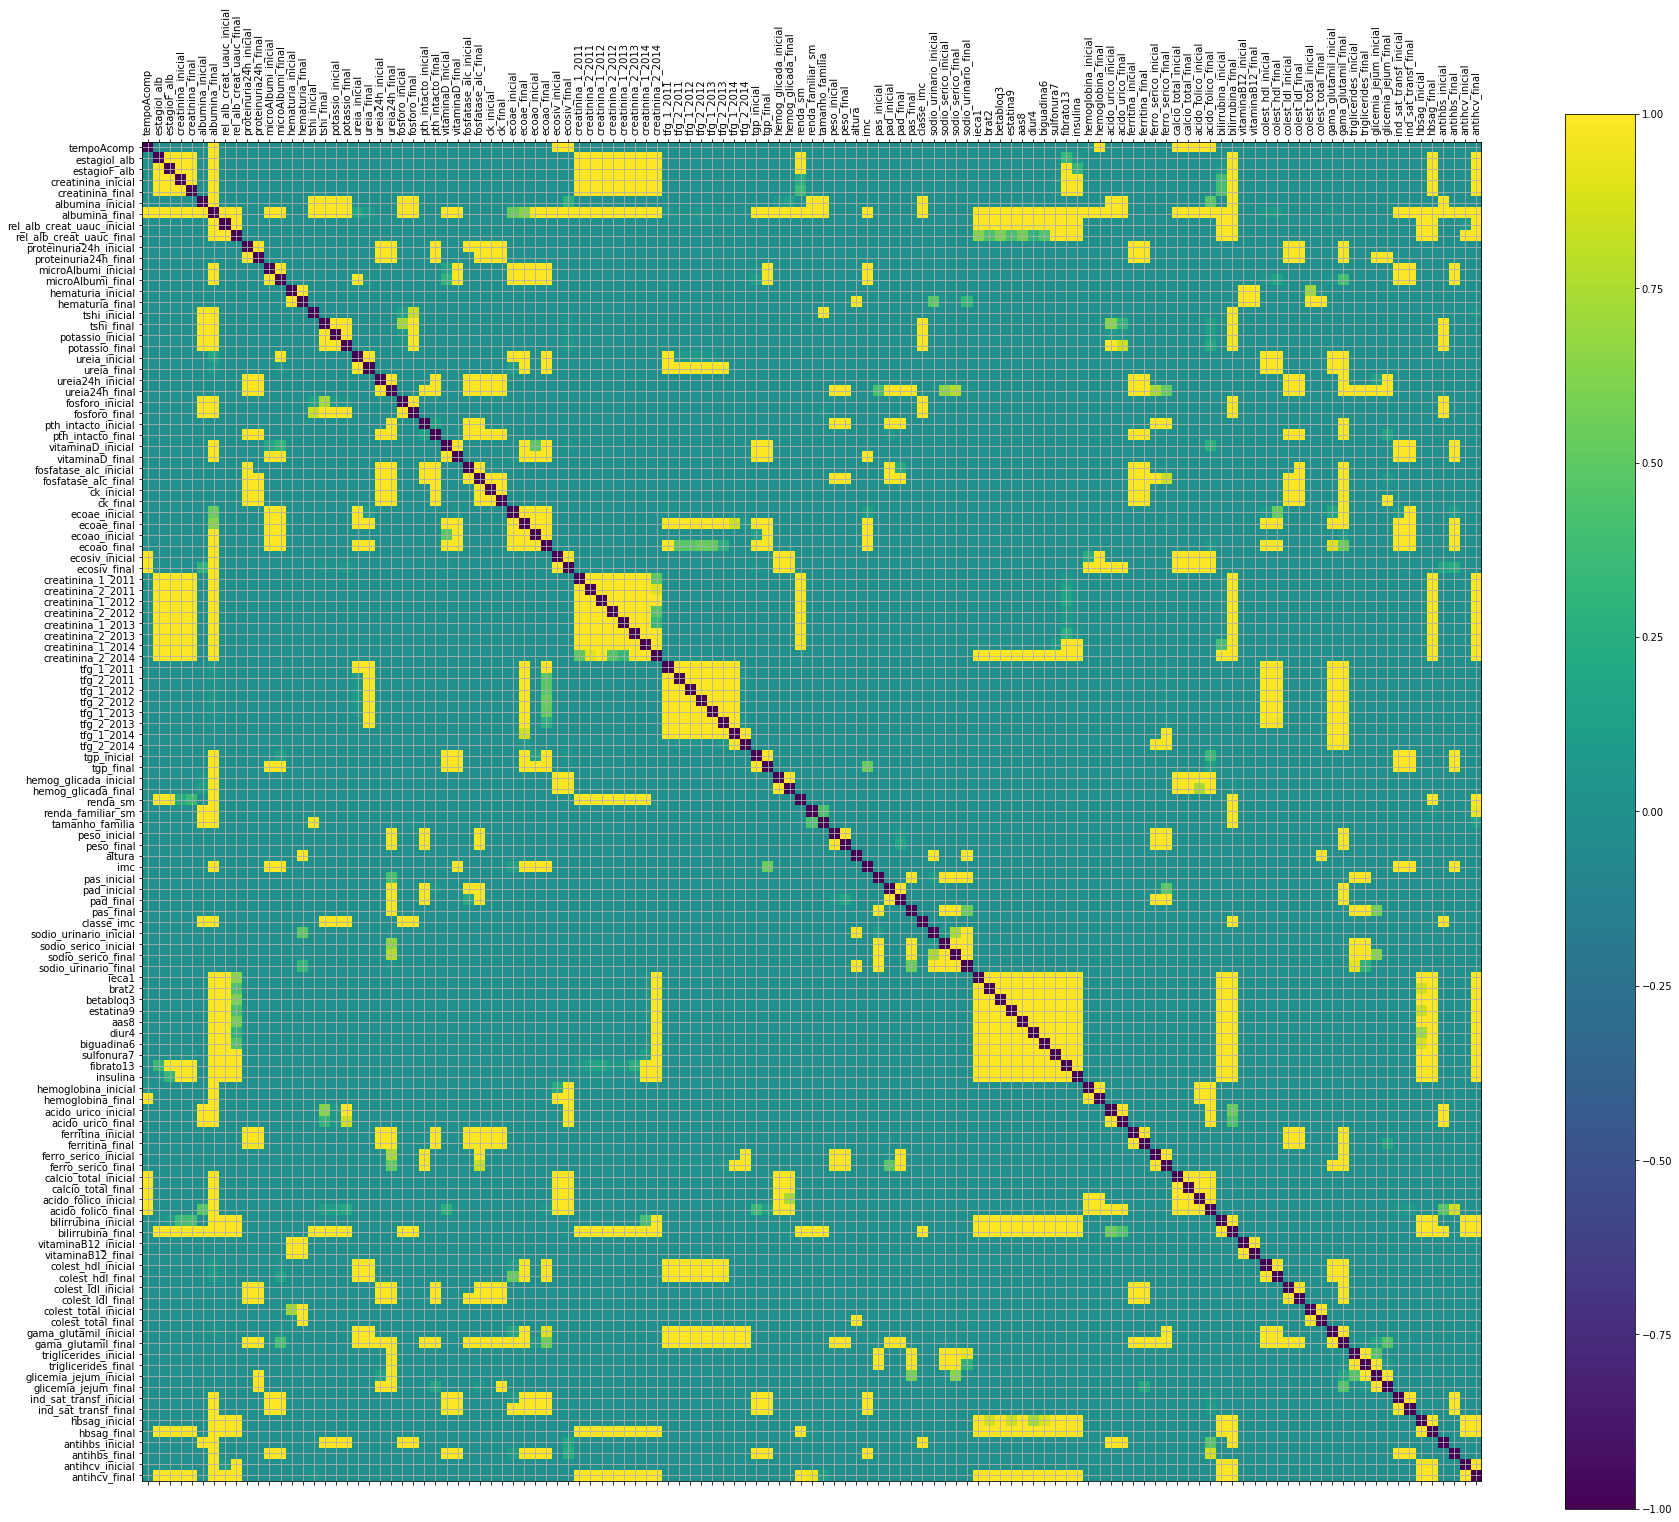

In [97]:
test = [*args]
fig = plt.figure(figsize=(30,25))


df = sp.posthoc_dunn(test, p_adjust = 'holm')


cax = plt.matshow(df, fignum=1)
fig.colorbar(cax)
plt.xticks(range(0,len(dic_snulo.keys())),dic_snulo.keys(), rotation = 90)
plt.yticks(range(0,len(dic_snulo.keys())),dic_snulo.keys())

plt.grid()
plt.savefig('121por121.png')
plt.show()
# plt.matshow(df)
# df.to_csv("dunn_test.csv")

/home/gabic9814/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/home/gabic9814/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


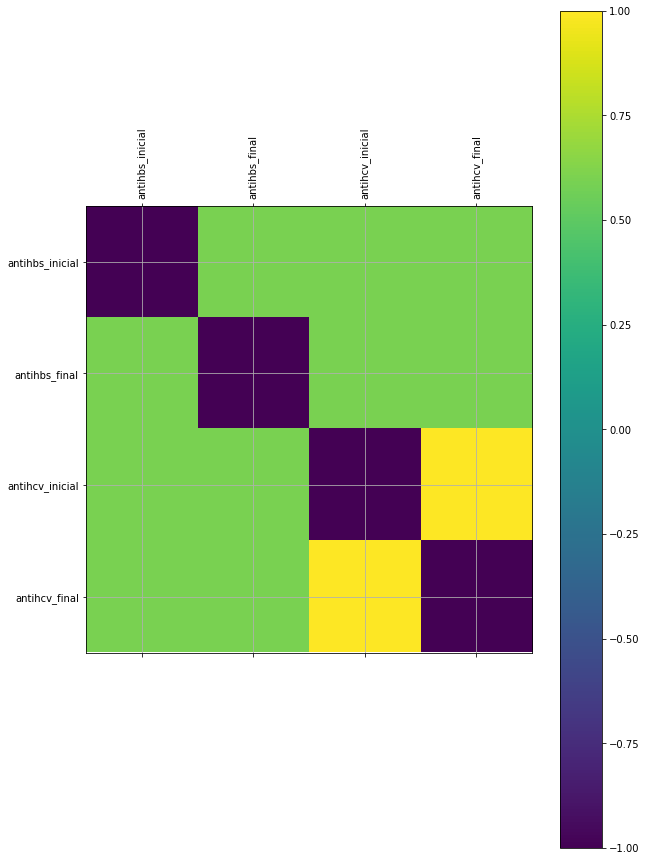

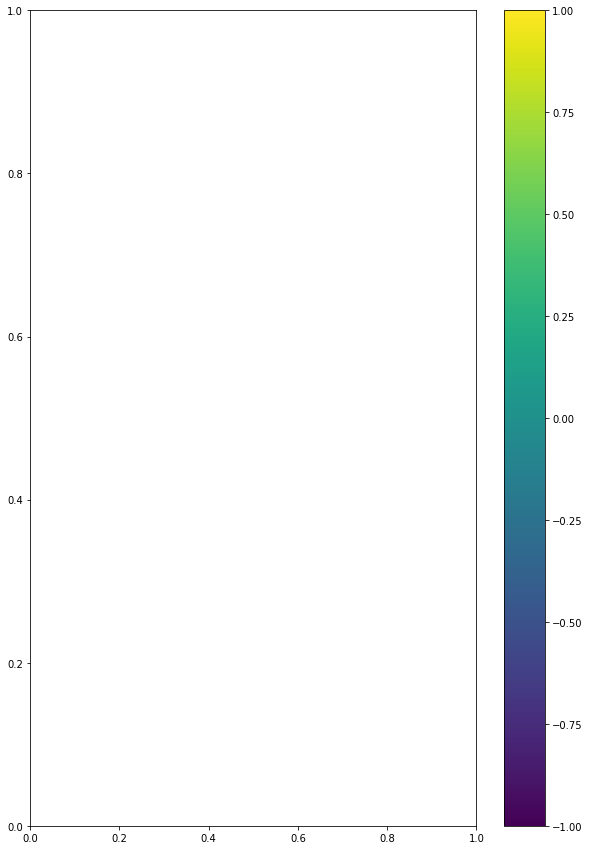

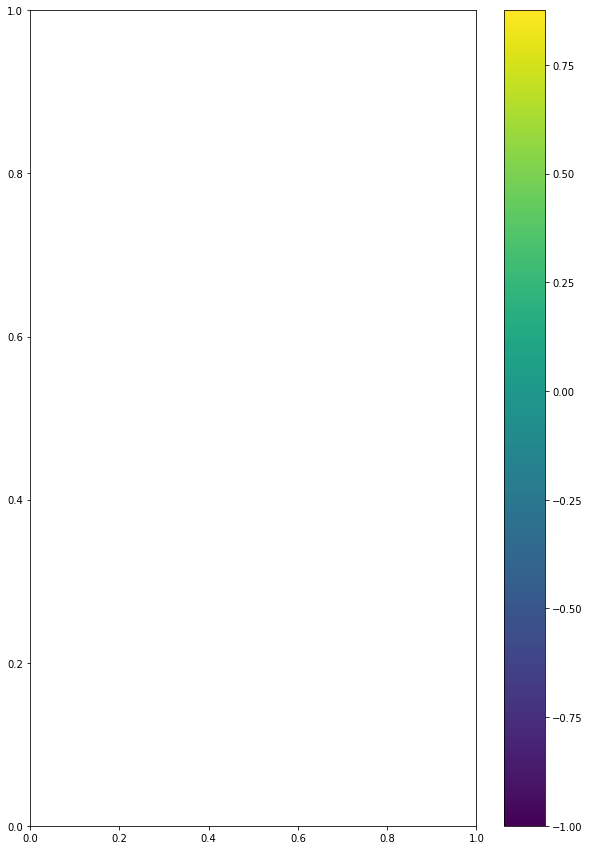

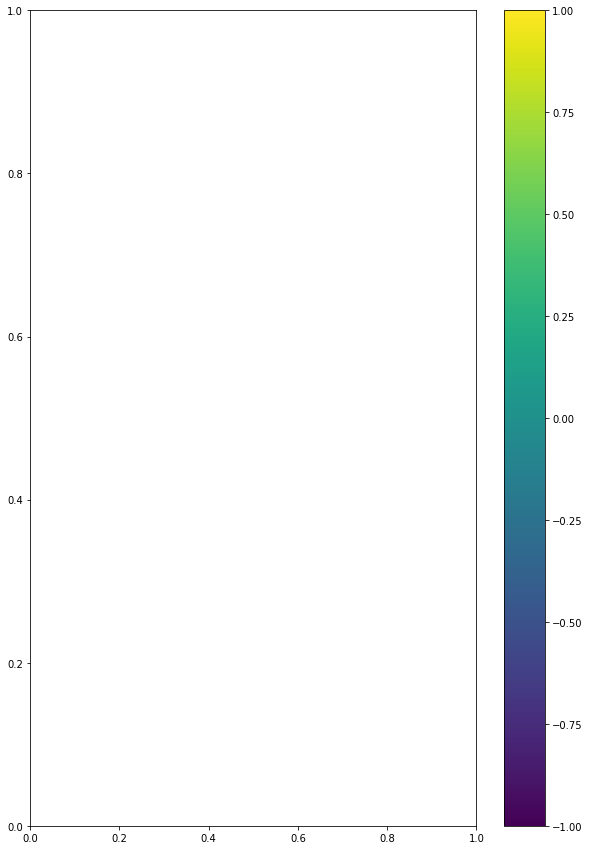

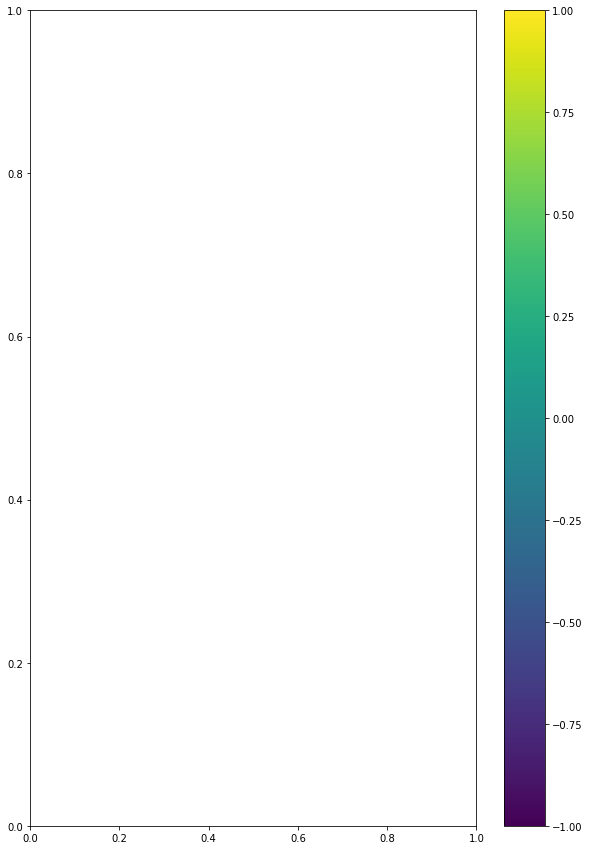

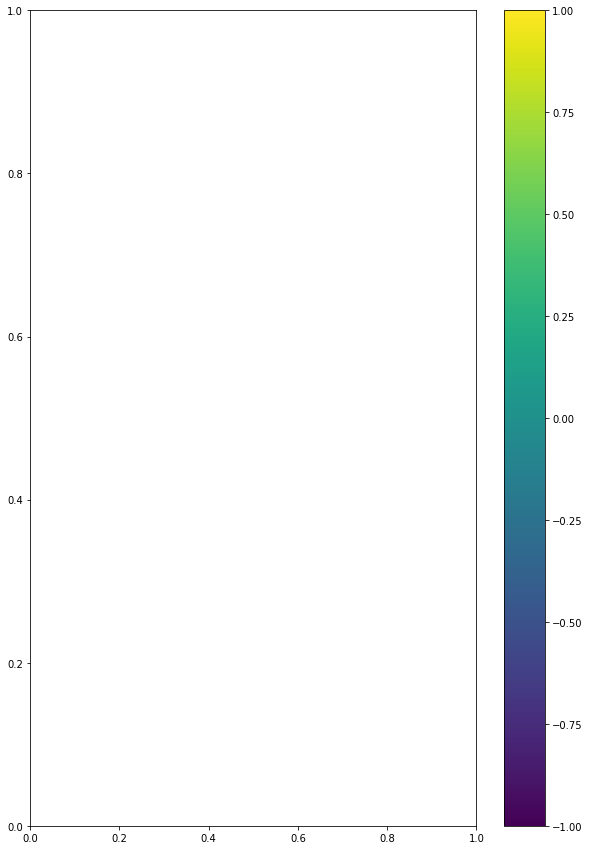

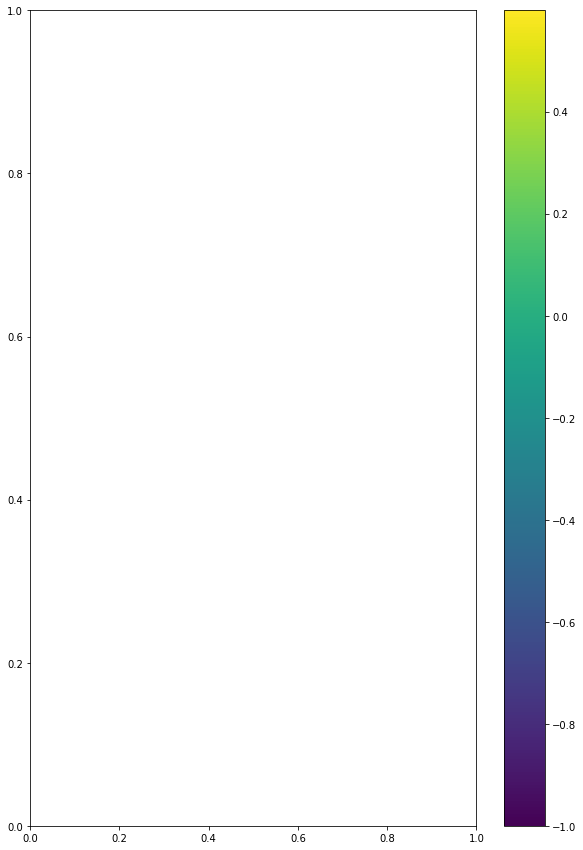

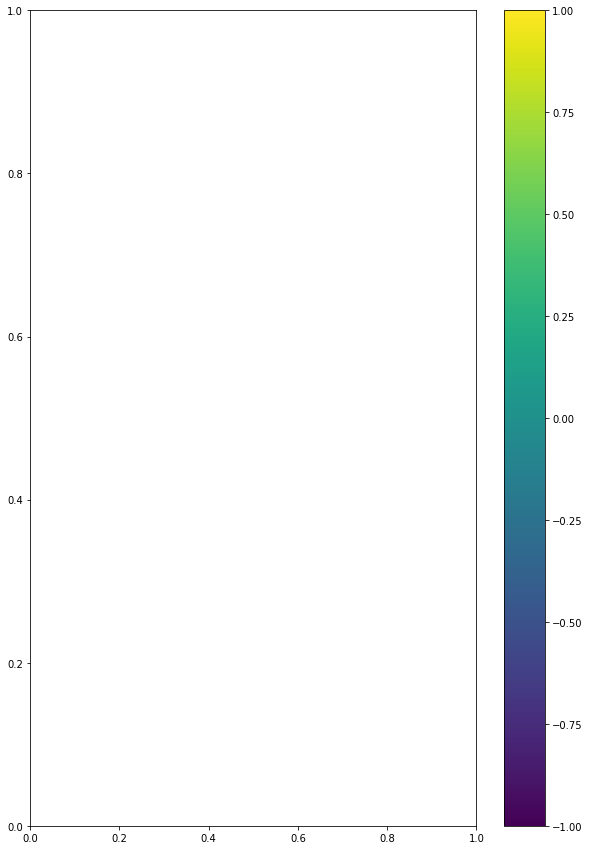

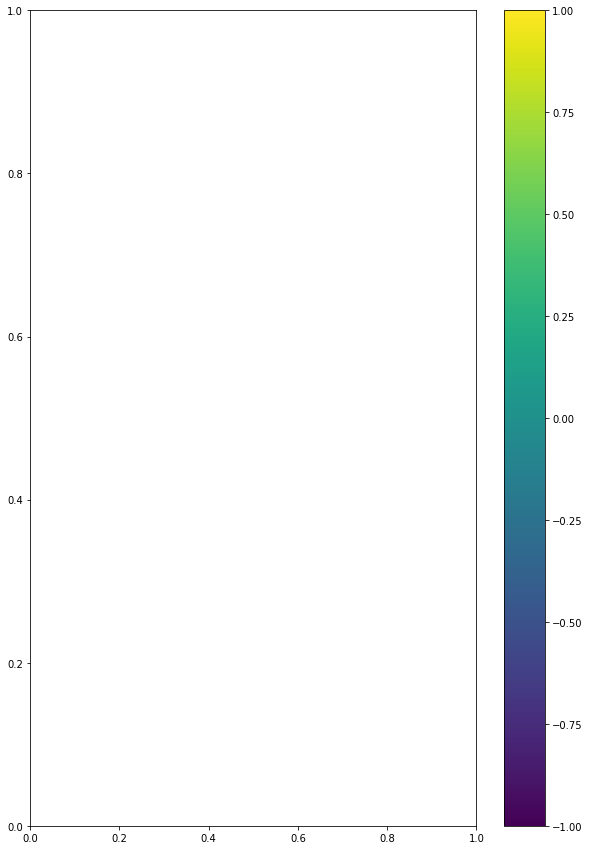

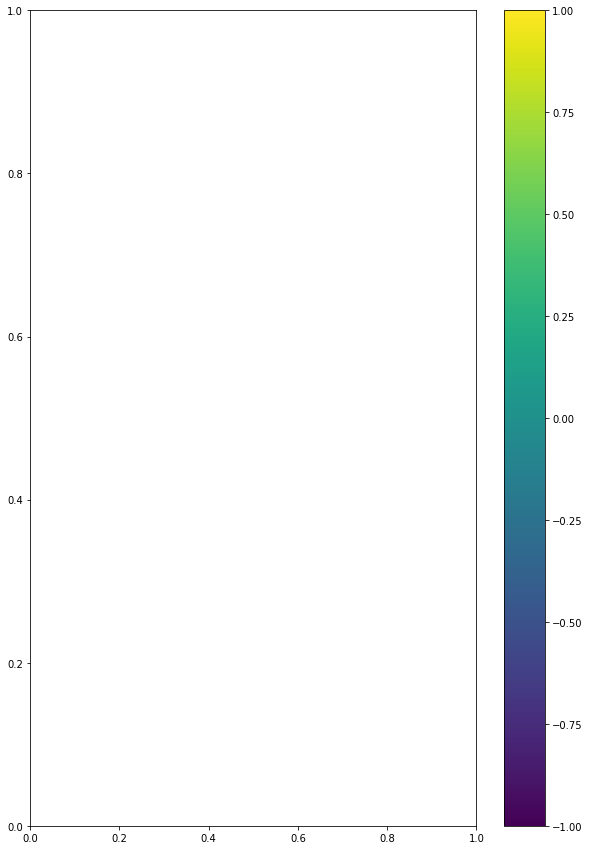

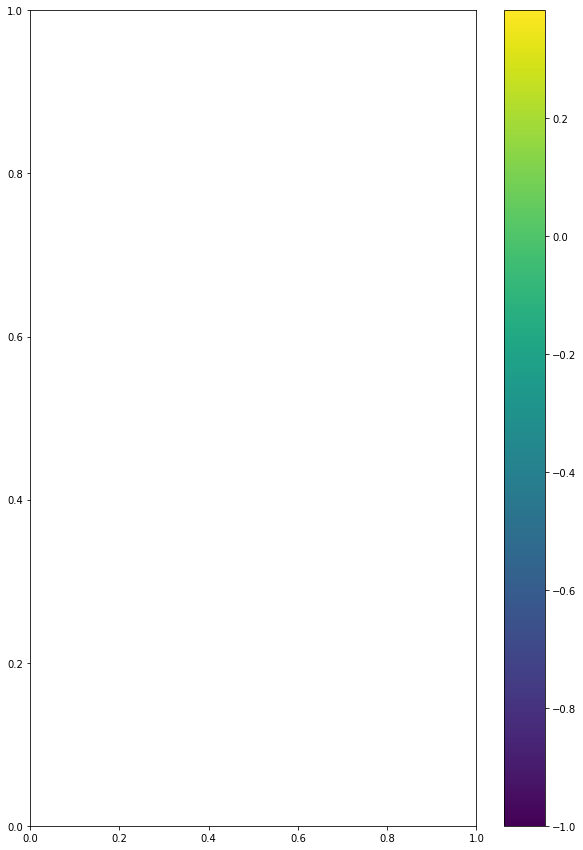

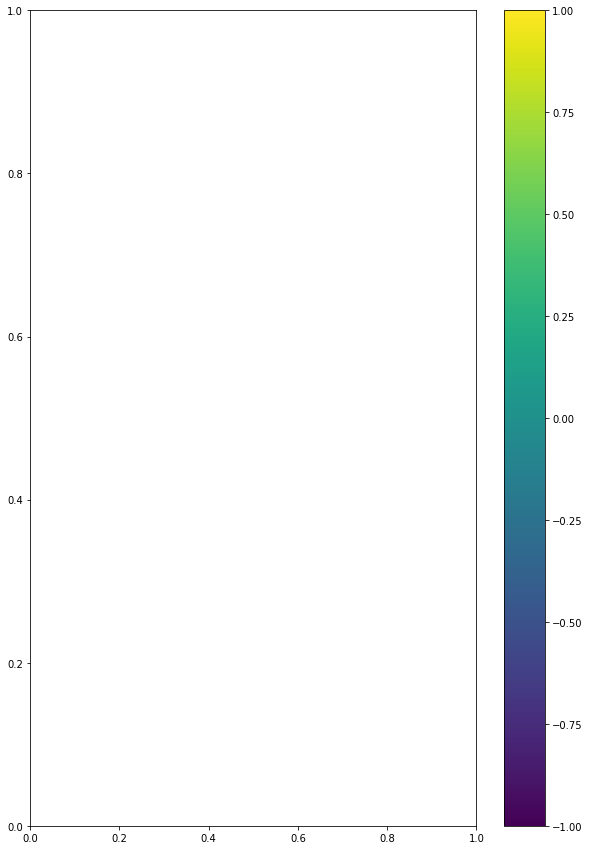

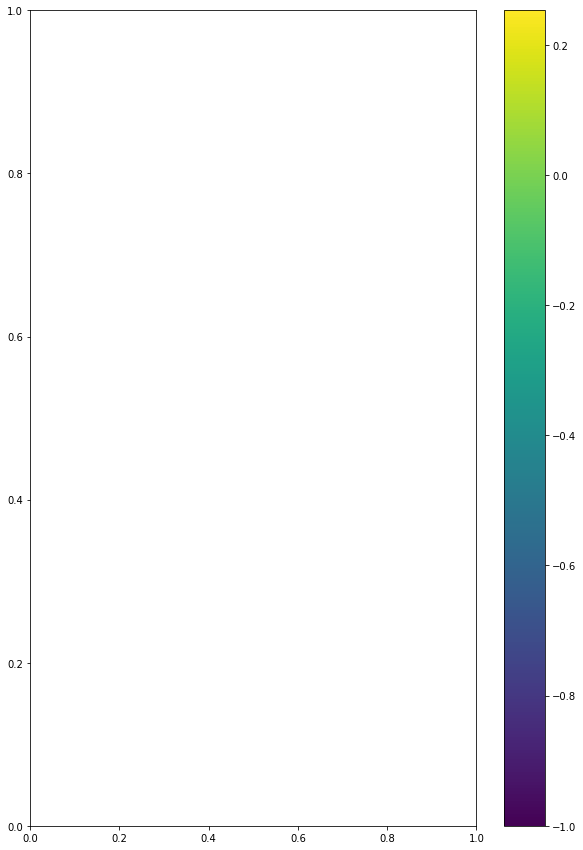

In [130]:
# Separar os grupos e fazer os calculos
dic_aux = list(dic_snulo.keys())
aux_cont = 0
aux_parada = 0
for i in range(len(dic_snulo.keys())):
    if aux_cont == 9:
        fig = plt.figure(figsize=(10,15))
        df = sp.posthoc_dunn(test[aux_parada:i], p_adjust = 'holm')
        
        cax = plt.matshow(df, fignum=1)
        fig.colorbar(cax)
        
        
        plt.xticks(range(0,len(test[aux_parada:i])),dic_aux[aux_parada:i], rotation = 90)
        plt.yticks(range(0,len(test[aux_parada:i])),dic_aux[aux_parada:i])

        plt.grid()
        plt.savefig('de'+str(aux_parada)+'parte'+str(i)+'.png')
        
        aux_parada = i
        aux_cont =0
    elif i!=120:
        aux_cont += 1
    else:
        fig = plt.figure(figsize=(10,15))
        df = sp.posthoc_dunn(test[117:121], p_adjust = 'holm')
        
        cax = plt.matshow(df, fignum=1)
        fig.colorbar(cax)


        plt.xticks(range(0,len(test[117:121])),dic_aux[117:121], rotation = 90)
        plt.yticks(range(0,len(test[117:121])),dic_aux[117:121])

        plt.grid()
        plt.savefig('de'+str(117)+'parte'+str(121)+'.png')
        
    
        
   

In [13]:
# dic_snulo.keys()

In [19]:
# aux = pd.DataFrame([dic_snulo['tempoAcomp'],dic_snulo['hemoglobina_inicial'],dic_snulo['diur4']])
# tempoAcomp = dic_snulo['tempoAcomp']
# hemoglobina = dic_snulo['hemoglobina_inicial']
# diur4 = dic_snulo['diur4']
# type(tempoAcomp)

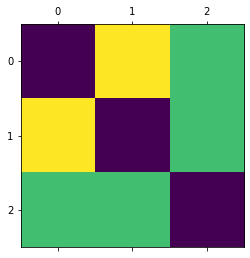

In [18]:
# test = [tempoAcomp,hemoglobina,diur4]
# df = sp.posthoc_dunn(test, p_adjust = 'holm')
# plt.matshow(df)
# df.to_csv("test.csv")

In [3]:
# type(dic_snulo['tempoAcomp'])

# Kruskal - Wallis 

In [4]:
# p = stats.kruskal(*aux)
# print(p)
# p = p.pvalue
# alpha = 0.05
# if p <= alpha:
# 	print('Same distribution (fail to reject H0)')
# else:
# 	print('Different distribution (reject H0)')
# # p = stats.kruskal(tempoAcomp,hemoglobina, diur4)
# # print(p)
# # p = p.pvalue
# # alpha = 0.05
# # if p <= alpha:
# # 	print('Same distribution (fail to reject H0)')
# # else:
# # 	print('Different distribution (reject H0)')

In [5]:
# print(*aux)